# EDA

## Background
Source: https://www.kaggle.com/code/tomforbes/optiver-trading-at-the-close-introduction

Each trading day on the Nasdaq Stock Exchange concludes with the Nasdaq Closing Cross auction. This process establishes the official closing prices for securities listed on the exchange. Almost 10% of Nasdaq’s average daily volume occurs in the closing auction. 

We are challenged to develop a model capable of predicting the closing price movements for hundreds of Nasdaq listed stocks using data from the order book and the closing auction of the stock.

### Financial concepts
 **Auction**
 
 In financial markets, an auction is a mechanism for determining the price of a particular asset by allowing multiple buyers and sellers to interact directly in a controlled, regulated environment.

 In a closing auction, orders are collected over a pre-determined timeframe and then matched at a single price determined by the buy & sell demand expressed by auction participants. For Nasdaq Closing auctions, the exchange begins accepting orders at the start of the trading day and begins publishing the state of the auction book at 3:50pm ET for 10 minutes before the market closes at 4pm ET, at which point the orders are matched instantly at a single price.

 The closing price is determined as: The price at which the maximum number of shares can be matched.

 **Continious trading order book**
 
 The term order book refers to an electronic list of buy (also known as bid) and sell (also known as ask) orders for a specific security or financial instrument organized by price level. For an order book in continuous trading, the highest bid price will always be less than the lowest ask price, since otherwise the orders would be matched. 

 **Acution order book**

 The auction order book behaves slightly differently to the order book for continuous trading. In this book, the orders are not immediately matched, but instead collected until the moment the auction ends. The book is referred to as *in cross* if best bid and ask are overlapping. The closing auction price is therefore referred to as the *uncross price*. The matched size is the number of shares matched at a given uncross price. The imbalance is the number of unmathced shares in the bid/ask direction depending on if the umatched shares at a higher/lower price than the closing price. The term far price refers to the hypothetical uncross price of the auction book, if it were to uncross at the reporting time. Nasdaq provides far price information 5 minutes before the closing cross.

 **Combined order book**

 Combining the two books can result in a more accurate reflection of the market's buying and selling interest at different price levels. This aids in better price discovery, allowing the market to reach a more accurate and fair equilibrium price when the auction uncrosses.

 The hypothetical uncross price of combined book is called the near price. Nasdaq provides near price information 5 minutes before the closing cross. Nasdaq also provides an indication of the fair price called the reference price.

# Training data

In [2]:
import pandas as pd
import numpy as np

In [3]:
df_train = pd.read_csv("../data/train.csv")

In [4]:
df_train.head()

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
0,0,0,0,3180602.69,1,0.999812,13380276.64,NaN,NaN,0.999812,60651.50,1.000026,8493.03,1.0,-3.029704,0,0_0_0
1,1,0,0,166603.91,-1,0.999896,1642214.25,NaN,NaN,0.999896,3233.04,1.000660,20605.09,1.0,-5.519986,0,0_0_1
2,2,0,0,302879.87,-1,0.999561,1819368.03,NaN,NaN,0.999403,37956.00,1.000298,18995.00,1.0,-8.389950,0,0_0_2
3,3,0,0,11917682.27,-1,1.000171,18389745.62,NaN,NaN,0.999999,2324.90,1.000214,479032.40,1.0,-4.010200,0,0_0_3
4,4,0,0,447549.96,-1,0.999532,17860614.95,NaN,NaN,0.999394,16485.54,1.000016,434.10,1.0,-7.349849,0,0_0_4


<Axes: title={'center': 'Auction sizing'}, xlabel='seconds_in_bucket'>

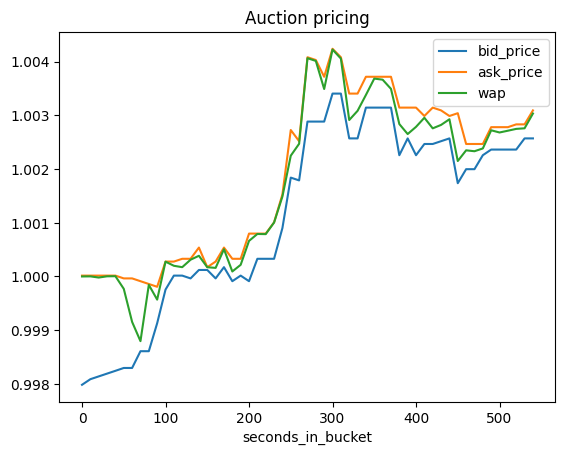

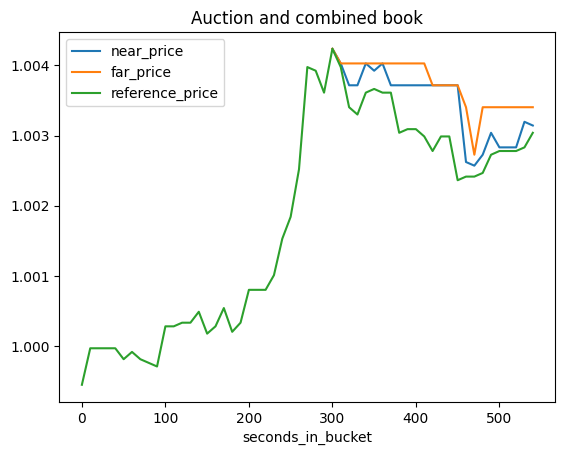

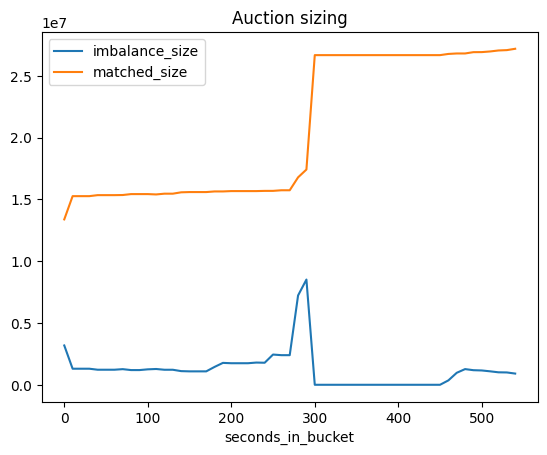

In [30]:
stock_id = 2
date_id = 4
(
    df_train
    .query("stock_id == @stock_id & date_id == @date_id")
    [["seconds_in_bucket", "bid_price", "ask_price", "wap"]]
    .set_index("seconds_in_bucket")
    .plot(title = "Auction pricing")
)
(
    df_train
    .query("stock_id == @stock_id & date_id == @date_id")
    [["seconds_in_bucket", "near_price", "far_price", "reference_price"]]
    .set_index("seconds_in_bucket")
    .plot(title="Auction and combined book")
)
(
    df_train
    .query('stock_id ==0 & date_id ==0')
    [['seconds_in_bucket','imbalance_size','matched_size']]
    .set_index('seconds_in_bucket')
    .plot(title='Auction sizing')
)
